In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from BatchLab import BatchLab
import numpy as np
%matplotlib inline

In [2]:
tend = 30
dt = 0.1

In [3]:
bl = BatchLab(tend, dt)

In [4]:
C_init=0.1/4
bl.add_species(element='H3PO4', init_C=C_init)
bl.add_species(element='H2PO4', init_C=C_init)
bl.add_species(element='HPO4', init_C=C_init)
bl.add_species(element='PO4', init_C=C_init)

bl.add_acid(species=['H3PO4', 'H2PO4', 'HPO4', 'PO4'], pKa=[2.148, 7.198, 12.375])

bl.add_species(element='Na', init_C=0)

bl.add_ion(element='Na', charge=1)

In [5]:
bl.dcdt['Na'] = '1e-2'

In [6]:
bl.solve()

Simulation started:
	 2017-09-13 17:16:28


Estimated time of the code execution:
	 0h:00m:01s
Will finish approx.:
	 2017-09-13 17:16:31


/Users/MarkelovIgor/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


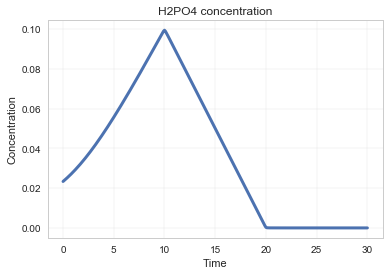

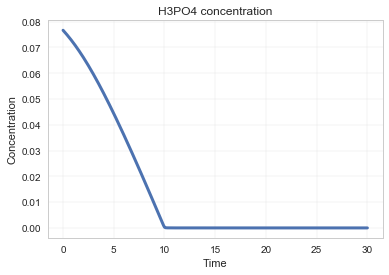

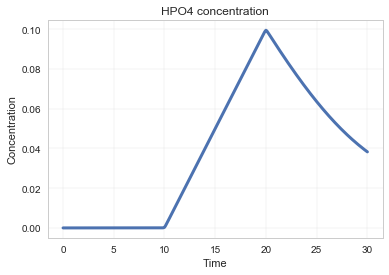

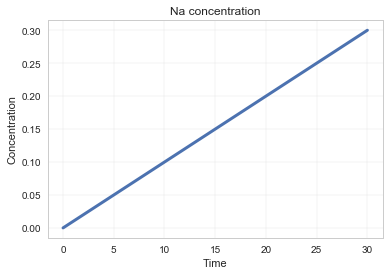

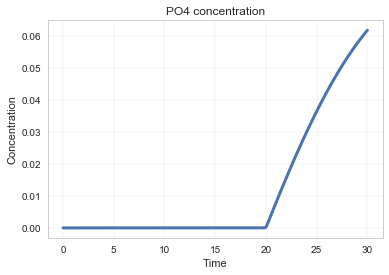

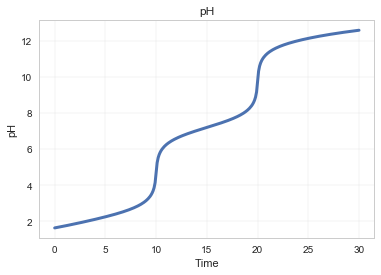

In [7]:
bl.plot_profiles()

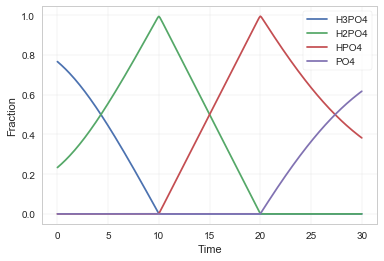

In [8]:
bl.plot_fractions()